# Generating choice sets


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Make a table representing full factorial experiment design.

With columns:

```
v (vendor type code)
vendor type
gc (ground vehicle delivery fee code)
ground vehicle fee
gt (ground vehicle delivery wait time code)
ground vehicle delivery wait time
dc (drone delivery fee code)
drone fee
dt (drone delivery wait time code)
drone delivery wait time
dp (drone privacy code)
drone privacy 

```

In [2]:
from attributes import (
    VENDOR_TYPES, COST_LEVELS, TIME_LEVELS, DRONE_PRIVACY_LEVELS,
)

# start with vendor type: 0: take-out food

v = 0
vendor_type = VENDOR_TYPES[v]
fees = COST_LEVELS[v]
wait_times = TIME_LEVELS[v]
drone_privacy = DRONE_PRIVACY_LEVELS

print('using')
print('vendor: %s: %s' % (v, vendor_type))
print('delivery fees: %s' % fees)
print('delivery wait times: %s' % wait_times)

using
vendor: 0: take-out food
delivery fees: [0, 1, 3, 5]
delivery wait times: [15, 20, 30, 45]


In [3]:
def get_data_records_for_vendor(v):
    vendor_type = VENDOR_TYPES[0]
    fees = COST_LEVELS[v]
    wait_times = TIME_LEVELS[v]
    drone_privacy = DRONE_PRIVACY_LEVELS
    print('get data records using')
    print('vendor: %s: %s' % (v, vendor_type))
    print('delivery fees: %s' % fees)
    print('delivery wait times: %s' % wait_times)
    data_records = []
    for ground_vehicle_fee_code, ground_vehicle_fee in enumerate(fees):
        for ground_vehicle_wait_time_code, ground_vehicle_wait_time in enumerate(wait_times):
            for drone_fee_code, drone_fee in enumerate(fees):
                for drone_wait_time_code, drone_wait_time in enumerate(wait_times):
                    for privacy_code, privacy in enumerate(drone_privacy):
                        data_record = {
                            'v': v,
                            'vendor type': vendor_type,
                            # ground vehicle cost
                            'gc': ground_vehicle_fee_code,
                            'ground vehicle fee': ground_vehicle_fee,
                            # ground vehicle time
                            'gt': ground_vehicle_wait_time_code,
                            'ground vehicle wait time': ground_vehicle_wait_time,
                            # drone cost
                            'dc': drone_fee_code,
                            'drone fee': drone_fee,
                            # drone time
                            'dt': drone_wait_time_code,
                            'drone wait time': drone_wait_time,
                            # drone privacy: 0/1
                            'dp': privacy_code,
                            'drone privacy': privacy
                        }
                        data_records += [data_record]
    return data_records

In [4]:
df = pd.DataFrame.from_records(get_data_records_for_vendor(v))
print('%s total rows' % len(df))
df

get data records using
vendor: 0: take-out food
delivery fees: [0, 1, 3, 5]
delivery wait times: [15, 20, 30, 45]
512 total rows


,v,vendor type,gc,ground vehicle fee,gt,ground vehicle wait time,dc,drone fee,dt,drone wait time,dp,drone privacy
0,0,take-out food,0,0,0,15,0,0,0,15,0,NO privacy
1,0,take-out food,0,0,0,15,0,0,0,15,1,YES privacy
2,0,take-out food,0,0,0,15,0,0,1,20,0,NO privacy
3,0,take-out food,0,0,0,15,0,0,1,20,1,YES privacy
4,0,take-out food,0,0,0,15,0,0,2,30,0,NO privacy
...,...,...,...,...,...,...,...,...,...,...,...,...
507,0,take-out food,3,5,3,45,3,5,1,20,1,YES privacy
508,0,take-out food,3,5,3,45,3,5,2,30,0,NO privacy
509,0,take-out food,3,5,3,45,3,5,2,30,1,YES privacy
510,0,take-out food,3,5,3,45,3,5,3,45,0,NO privacy


Add in columns representing difference between choices w.r.t. 
- time (delivery wait time): drone wait time - ground vehicle wait time: dt - gt
- cost (delivery fee): drone fee - ground vehicle fee


In [5]:
df['dt - gt'] = df['drone wait time'] - df['ground vehicle wait time']
df['dc - gc'] = df['drone fee'] - df['ground vehicle fee']

In [6]:
df['exclude'] = False

In [7]:
def plot_points_tradeoff(df):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=200)
    for i, privacy in enumerate(drone_privacy):
        ax = axes[i]
        df_p = df[df['drone privacy']==privacy]
        ax.scatter(
            df_p['dt - gt'], df_p['dc - gc'],
            color='gray', marker='.'
        )
        if ('exclude' in df_p.columns):
            df_p_no_exclude = df_p[df_p['exclude'] == False]
            ax.scatter(
                df_p_no_exclude['dt - gt'], df_p_no_exclude['dc - gc'],
                color='gray', marker='o',
            )
        if ('sampled' in df_p.columns):
            df_p_sampled = df_p[df_p['sampled'] == True]
            ax.scatter(
                df_p_sampled['dt - gt'], df_p_sampled['dc - gc'],
                color='black', marker='o',
            )
            
        ax.set_xlabel('drone wait time - ground vehicle wait time (mins)')
        ax.set_ylabel('drone cost - ground vehicle cost (\$)')
        ax.axvline(c='grey', lw=1)
        _ = ax.axhline(c='grey', lw=1)
        _ = ax.set_title(privacy)
    _ = fig.suptitle('Ground vehicle vs Drone choice differences w.r.t. cost and time')


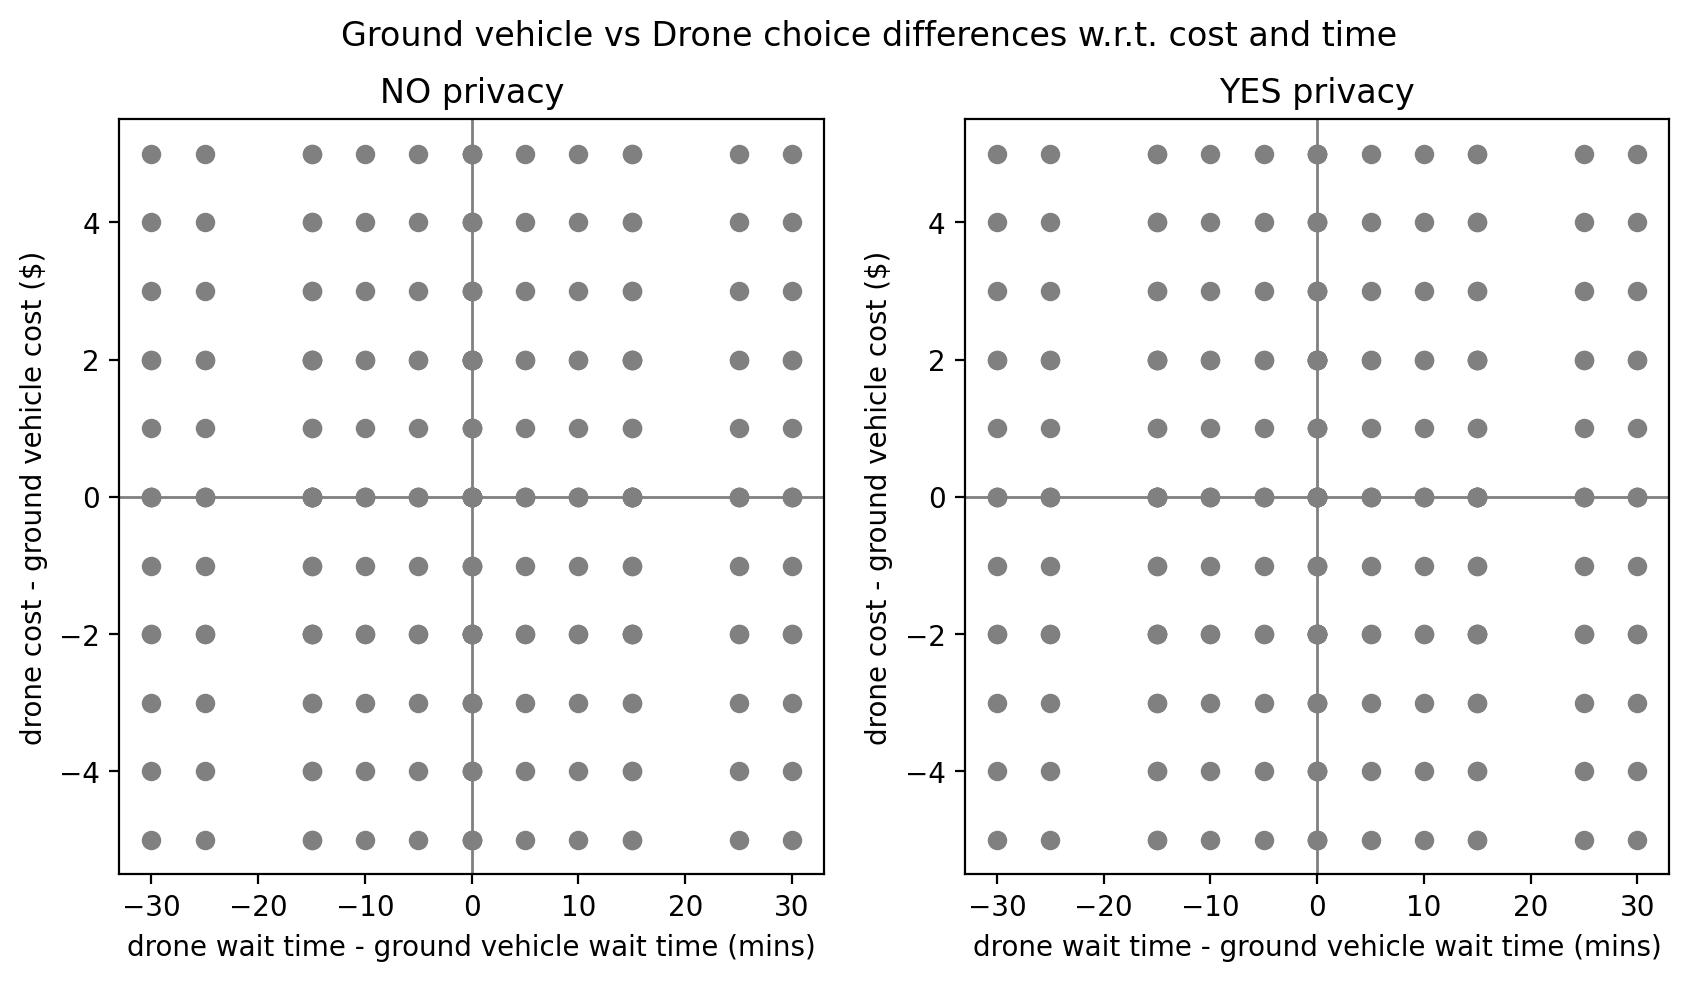

In [8]:
plot_points_tradeoff(df)

### Exclude choices

Exclude a choice if one option is "dominant" (with some wiggle room):

In [9]:
df['exclude'] = (
    ((df['dt'] - df['gt'] > 1) & (df['dc'] - df['gc'] > 1)) | \
    ((df['dt'] - df['gt'] < -1) & (df['dc'] - df['gc'] < -1))
)
df.loc[29:32]
# df.head()

,v,vendor type,gc,ground vehicle fee,gt,ground vehicle wait time,dc,drone fee,dt,drone wait time,dp,drone privacy,dt - gt,dc - gc,exclude
29,0,take-out food,0,0,0,15,3,5,2,30,1,YES privacy,15,5,True
30,0,take-out food,0,0,0,15,3,5,3,45,0,NO privacy,30,5,True
31,0,take-out food,0,0,0,15,3,5,3,45,1,YES privacy,30,5,True
32,0,take-out food,0,0,1,20,0,0,0,15,0,NO privacy,-5,0,False


delivery fees ($): [0, 1, 3, 5]
delivery wait times (mins): [15, 20, 30, 45]


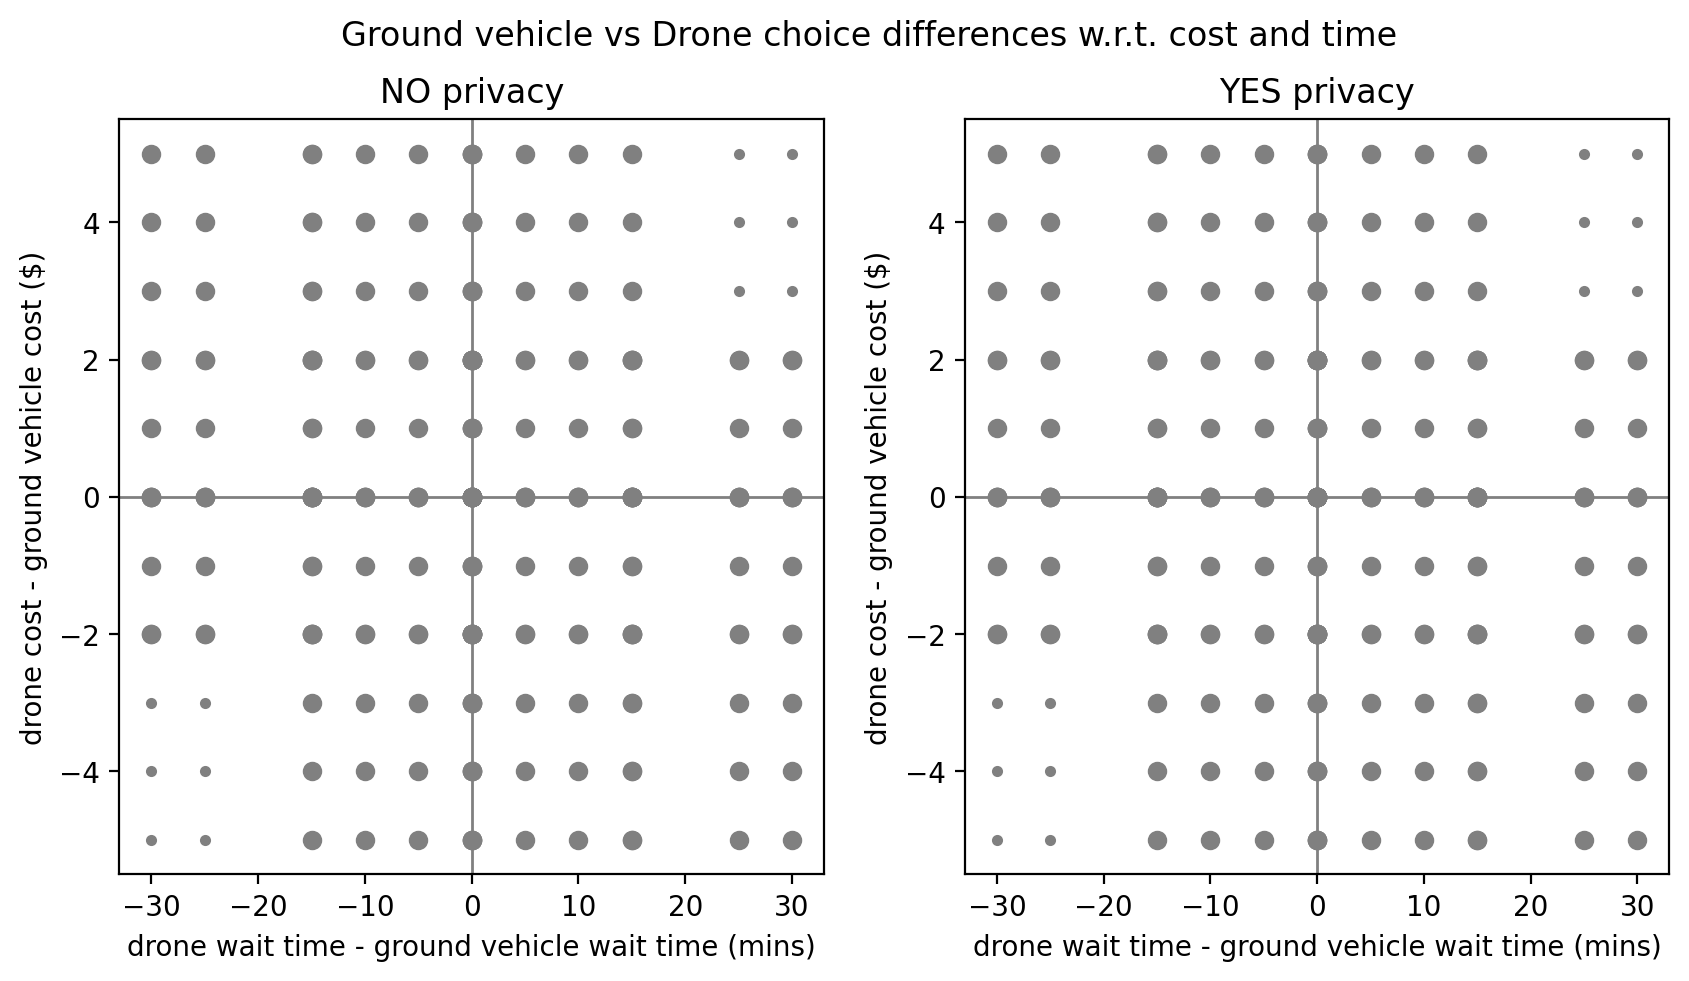

476 non-excluded choices


In [10]:
print('delivery fees ($):', fees)
print('delivery wait times (mins):', wait_times)
plot_points_tradeoff(df)
plt.show()
print('%s non-excluded choices' % len(df[df['exclude']==False]))

Also, drone deliveries are marketed as fast! Remove choices where

no drone privacy
and
drone time > ground vehicle time
and
drone cost > ground vehicle cost

In [11]:
df['exclude'] = ((df['exclude']==True) | ((df['dp']==0) & (df['dt'] > df['gt']) & (df['dc'] > df['gc'])))

delivery fees ($): [0, 1, 3, 5]
delivery wait times (mins): [15, 20, 30, 45]


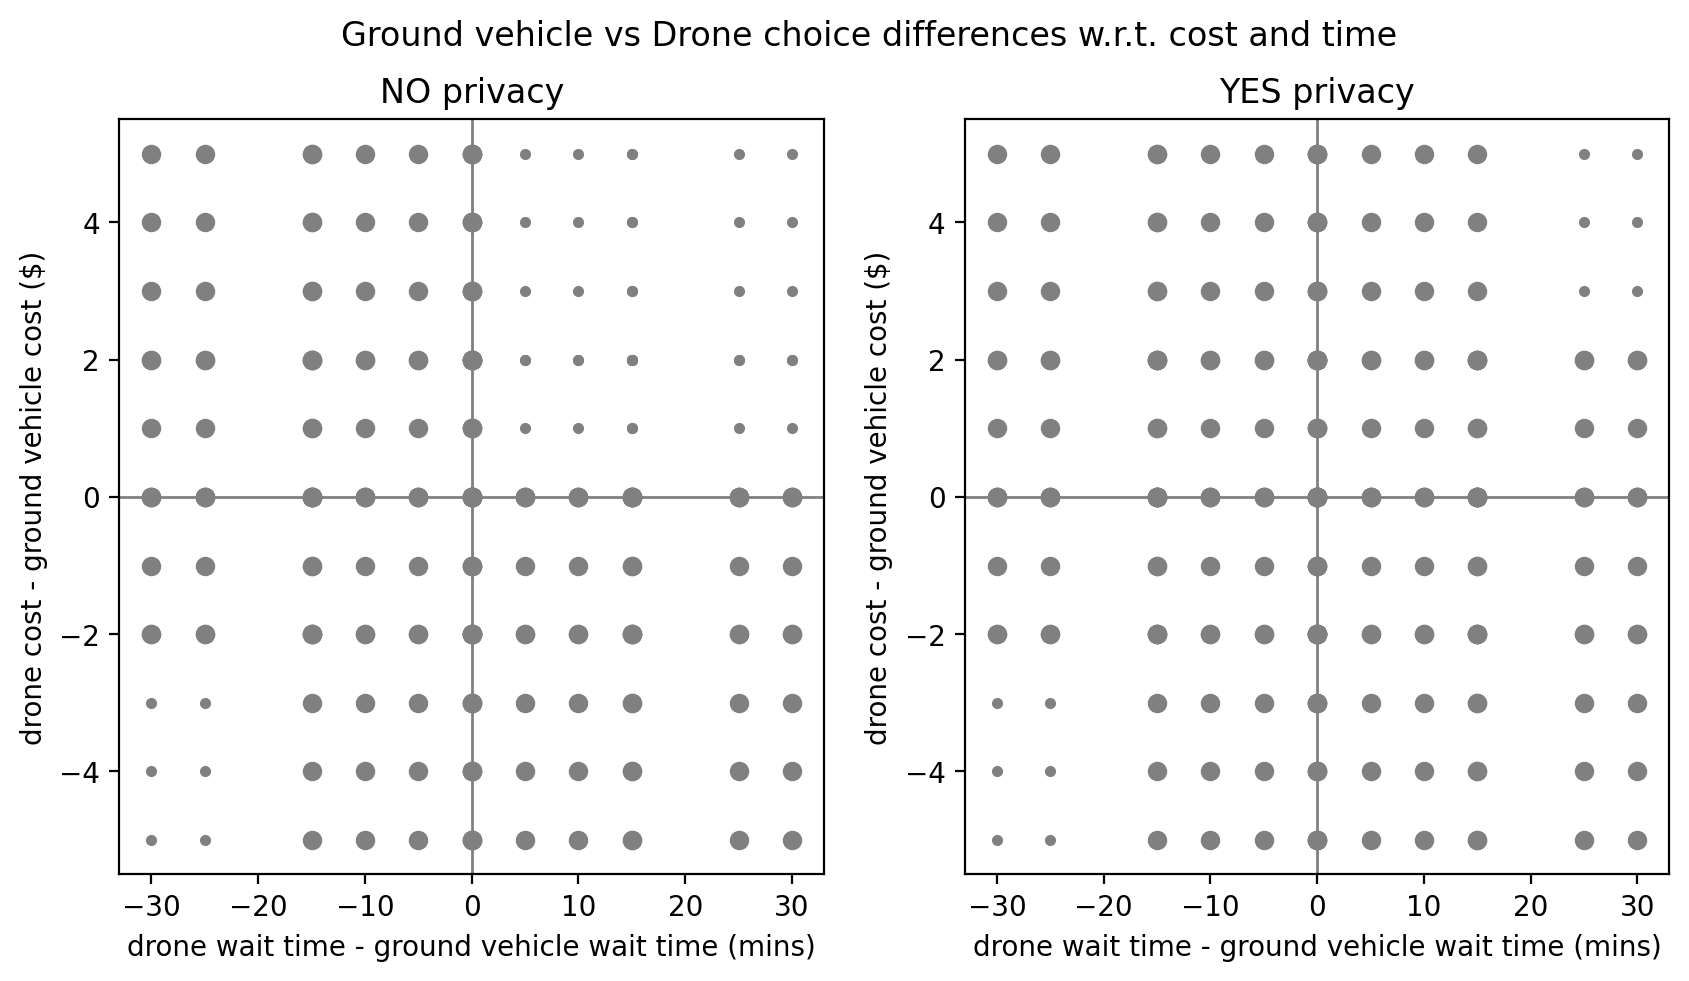

449 non-excluded choices


In [12]:
print('delivery fees ($):', fees)
print('delivery wait times (mins):', wait_times)
plot_points_tradeoff(df)
plt.show()
print('%s non-excluded choices' % len(df[df['exclude']==False]))

Simply exclude any choices where one alternative dominates the other w.r.t. both cost and time.

368 non-excluded choices


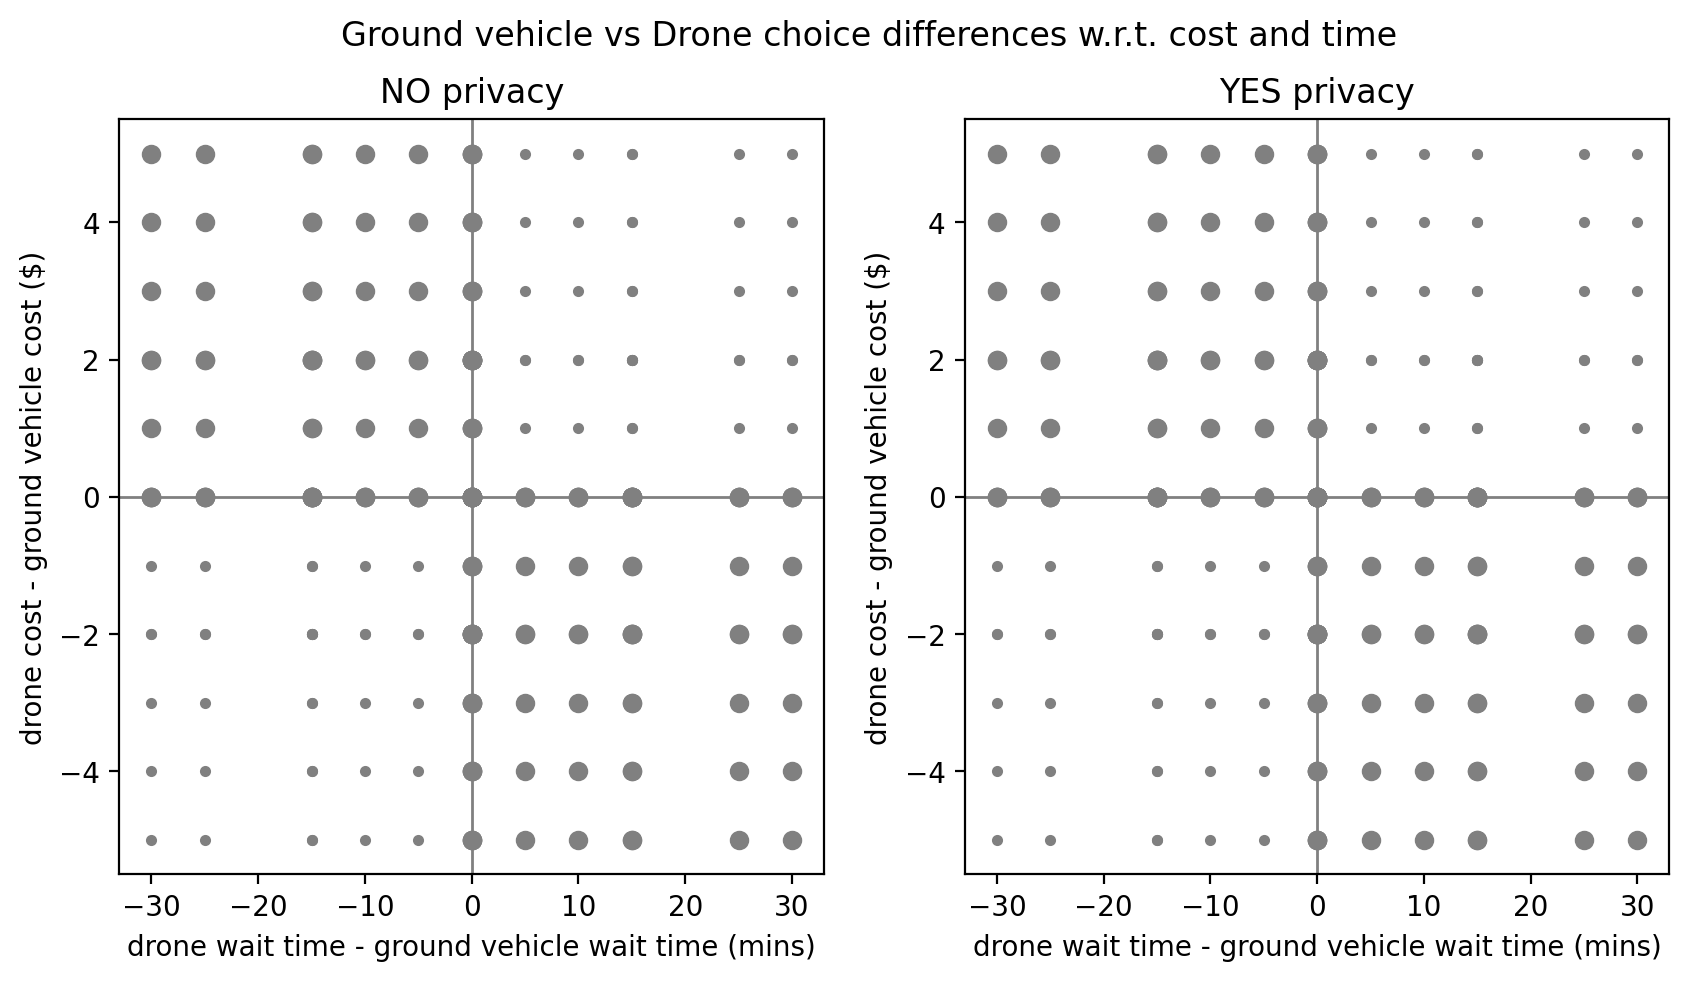

In [13]:
df['exclude'] = (
    ((df['dt'] - df['gt'] > 0) & (df['dc'] - df['gc'] > 0)) | \
    ((df['dt'] - df['gt'] < 0) & (df['dc'] - df['gc'] < 0))
)
plot_points_tradeoff(df)
print('%s non-excluded choices' % len(df[df['exclude']==False]))

Randomly sample a subset of non-excluded choices for which to generate questions.

In [14]:
QUESTIONS_SAMPLE_SIZE = 100

In [15]:
sampled_idx = np.random.choice(
    df[df['exclude']==False].index,
    QUESTIONS_SAMPLE_SIZE, 
    replace=False
)
print('sampled index: %s' % sampled_idx)
df['sampled'] = df.index.isin(sampled_idx)
df.head()

sampled index: [242 254 256 270  37 248 299 391  80   3 212 332 198 367 414 396  83 143
 392 184   1 470   8 293 393 275 301  32 460 120 309 272  66 140 371 144
 502  50 273 258 103 340 113  71 250 119 199 429 123 390   6 292 202 327
  43 382 246 114 374 218 276 178 235 124 335 232 397 453 173  36 358 413
 510  75 152 200  88  74 174 219 376   0 243 441 359  72  96   7  51 230
 201 294 418 334 430 339 261 116 171 126]


,v,vendor type,gc,ground vehicle fee,gt,ground vehicle wait time,dc,drone fee,dt,drone wait time,dp,drone privacy,dt - gt,dc - gc,exclude,sampled
0,0,take-out food,0,0,0,15,0,0,0,15,0,NO privacy,0,0,False,True
1,0,take-out food,0,0,0,15,0,0,0,15,1,YES privacy,0,0,False,True
2,0,take-out food,0,0,0,15,0,0,1,20,0,NO privacy,5,0,False,False
3,0,take-out food,0,0,0,15,0,0,1,20,1,YES privacy,5,0,False,True
4,0,take-out food,0,0,0,15,0,0,2,30,0,NO privacy,15,0,False,False


368 non-excluded choices
100 sampled choices


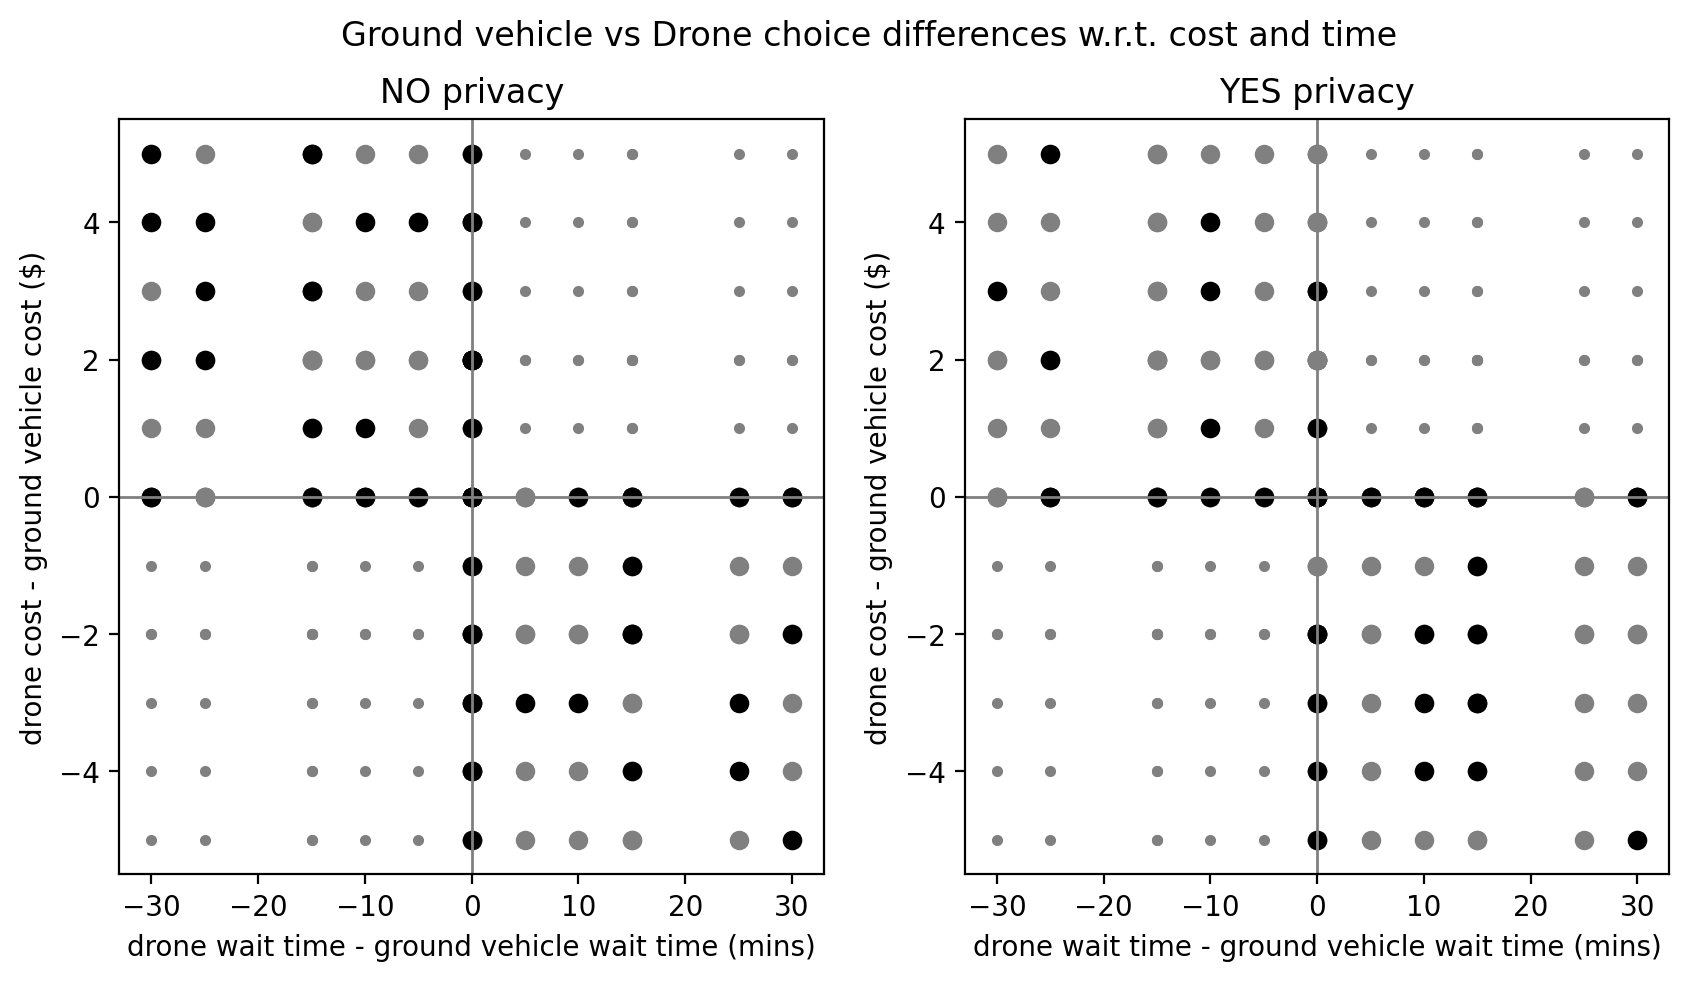

In [16]:
plot_points_tradeoff(df)
print('%s non-excluded choices' % len(df[df['exclude']==False]))
print('%s sampled choices' % QUESTIONS_SAMPLE_SIZE)

In [17]:
vendor_choices_filepath = './choice-sets/v%s-sampled-%s.csv' % (
    v, QUESTIONS_SAMPLE_SIZE
)
print('save to %s' % vendor_choices_filepath)

save to ./choice-sets/v0-sampled-100.csv


In [18]:
columns = ['v','gc','gt','dt','dc','dp']
save_df = df[df['sampled']==True][columns]
print('saving data table to %s...' % vendor_choices_filepath)
save_df.to_csv(vendor_choices_filepath, index=False)
print('...saved')

saving data table to ./choice-sets/v0-sampled-100.csv...
...saved


In [19]:
df = pd.read_csv(vendor_choices_filepath)
df.head()

,v,gc,gt,dt,dc,dp
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,1,0,1
3,0,0,0,3,0,0
4,0,0,0,3,0,1
